# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [2]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [41]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2]

for n_cluster:2 , score:0.5027144446956527
0
1
0
1
for n_cluster:3 , score:0.6105565451092732
0
1
2
0
1
2
0
1
2
for n_cluster:4 , score:0.6270122040179333
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
for n_cluster:5 , score:0.6115749260799671
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
for n_cluster:6 , score:0.5536735205455998
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
for n_cluster:7 , score:0.4690655005152273
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
for n_cluster:8 , score:0.38497696442277757
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


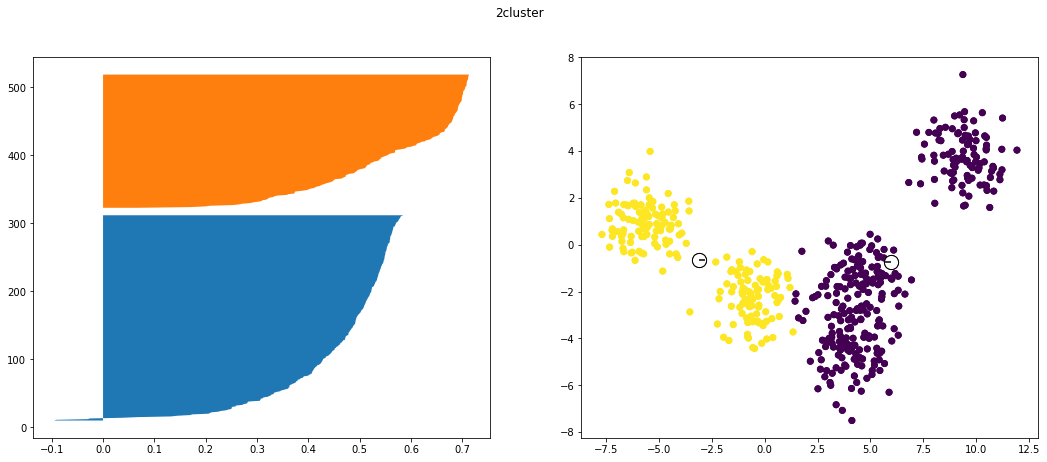

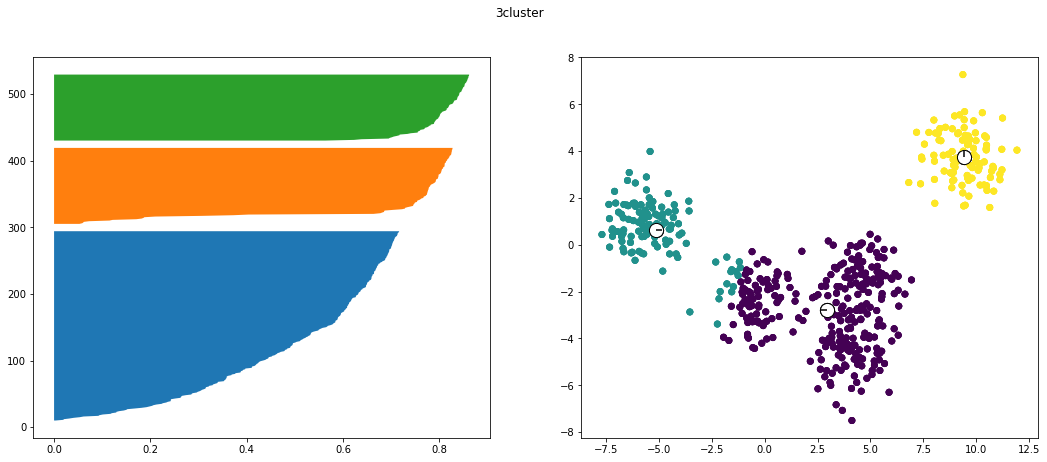

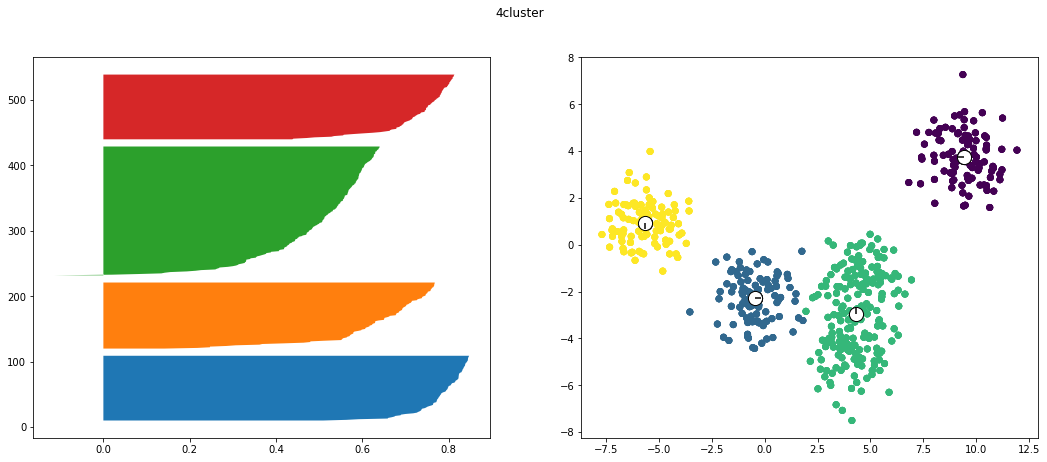

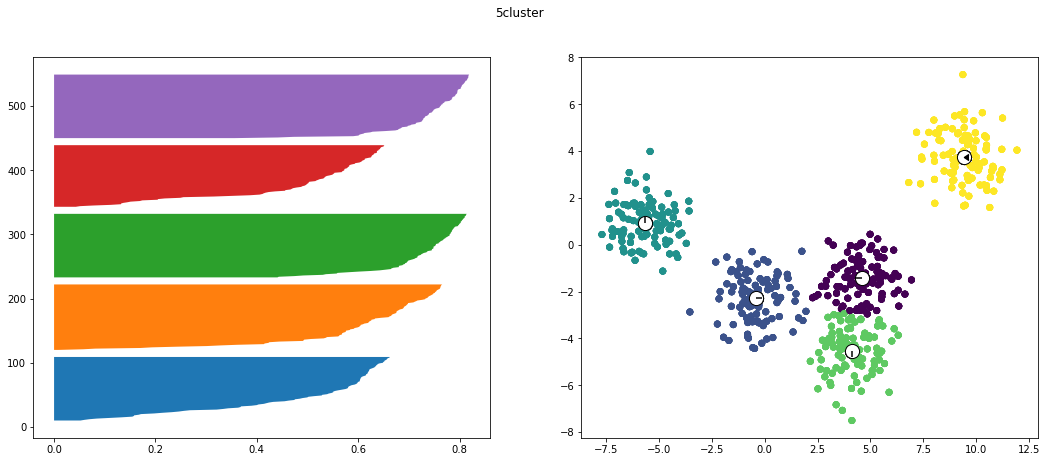

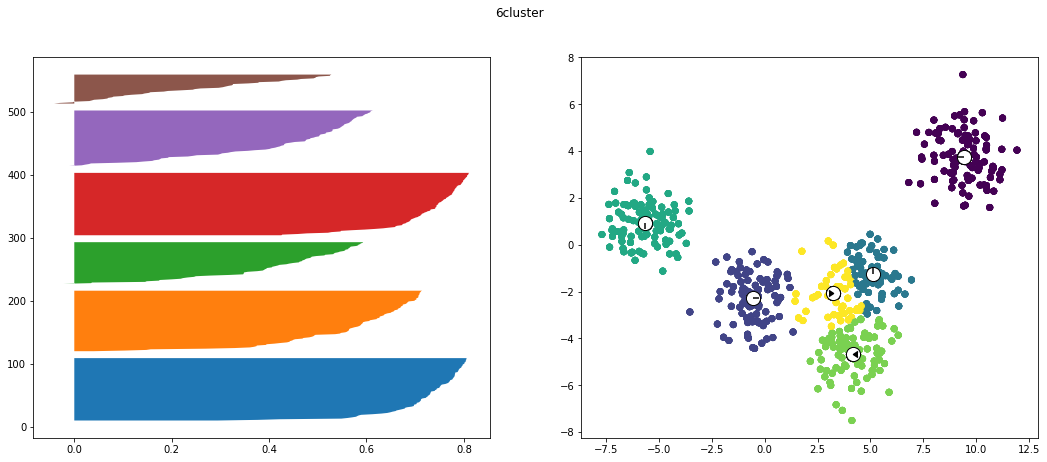

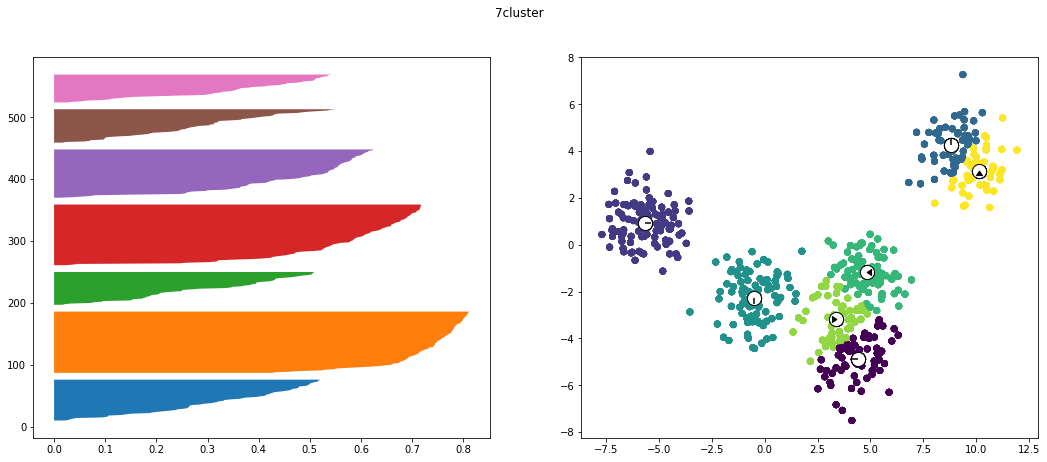

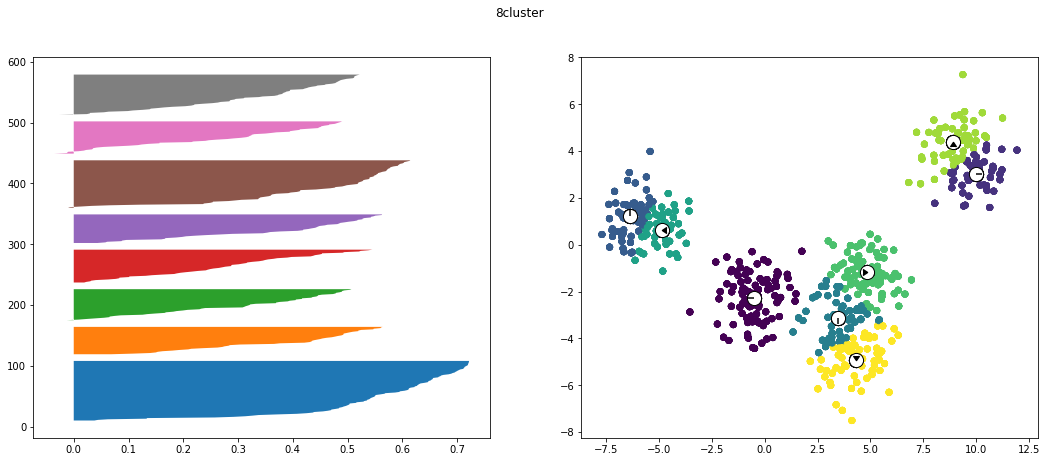

In [67]:
# 計算並繪製輪廓分析的結果

for n_cluster in range_n_clusters: #controls n_clusters
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7
                      )
    estimator = KMeans(n_clusters = n_cluster)
    estimator.fit(X)
    predicted_y = estimator.predict(X)
    
    print(f"for n_cluster:{n_cluster} , score:{silhouette_score(X,predicted_y)}")
    
    ith_cluster_score = silhouette_samples(X,predicted_y)
    y_lower = 10
    for i in range(n_cluster):#controls cluster i when estimator = KMeans(n_cluster = i)
        #i means ith cluster when estimator = KMeans(n_cluster = i)
        dth_score = ith_cluster_score[predicted_y == i] #dth _score means score of dth data in cluester i 
        dth_score.sort()
        
        y_upper = y_lower + dth_score.shape[0] #y-axis stand for dth data
        
        ax1.fill_betweenx(np.arange(y_lower,y_upper), #from bottom to top, y-axis stand for dth data
                        0,dth_score) #x axis stands for value of dth data
        
        y_lower = y_upper + 10
        
        center = estimator.cluster_centers_
        ax2.scatter(X[:,0],X[:,1],c = predicted_y)
        ax2.scatter(center[:,0],center[:,1],c = 'white',edgecolor = 'k',s = 200)
        
        #point cluster number
        
        for index,value in enumerate(center):
            print(index)
            plt.scatter(value[0],value[1],marker = index,c = 'k')
    plt.suptitle(str(n_cluster) + "cluster")